# Multi layer perceptron - digits

In [23]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from torch import optim
%matplotlib inline

In [3]:
digits = load_digits()
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [5]:
# Check the first sample's label
print(digits.target[0])

0


In [6]:
print('Number of total sample : {}'.format(len(digits.images)))

Number of total sample : 1797


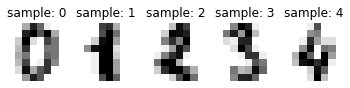

In [9]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # print 5 samples
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [18]:
for i in range(5):
  print(i,"index label: ",digits.target[i])


0 index label:  0
1 index label:  1
2 index label:  2
3 index label:  3
4 index label:  4


In [19]:
# print out the first sample
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [20]:
X = digits.data # image
Y = digits.target # label of the each image

### 2. Multi layer perceptron classifier

In [24]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [25]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [26]:
loss_fn = nn.CrossEntropyLoss() # includes softmax function

In [27]:
optimizer = optim.Adam(model.parameters())

In [28]:
losses = []

In [29]:
for epoch in range(100):
  optimizer.zero_grad()
  
  # forward
  y_pred = model(X) 
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())


Epoch    0/100 Cost: 2.824934
Epoch   10/100 Cost: 2.242163
Epoch   20/100 Cost: 2.056180
Epoch   30/100 Cost: 1.799869
Epoch   40/100 Cost: 1.527100
Epoch   50/100 Cost: 1.252752
Epoch   60/100 Cost: 1.018265
Epoch   70/100 Cost: 0.813825
Epoch   80/100 Cost: 0.629896
Epoch   90/100 Cost: 0.469663


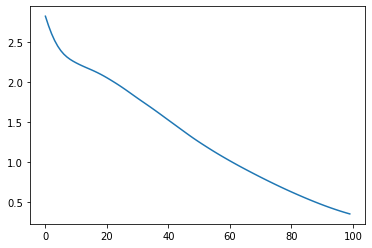

In [30]:
plt.plot(losses)